**DAT405 Introduction to Data Science and AI, 2021-2022, Study Period 1** <br/>
**Assignment 5: Reinforcement learning** <br/>
**Due Date: Oct 4, 23:59** <br/>

---


**What to submit**
*   **The entire assignment should be submitted through the notebook. No separate file will be accepted.** You can submit either the notebook itself, or a public link to a Google Colab notebook<br/>

*In the notebook:*
*	State your names and how many hours each person spent on the assignment.
*	The solutions and answers to the theoretical and practical problems, including LaTeX math-mode equations, plots and tables etc.
*	All plots/results should be visible such that the notebook does not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.<br/>

*Before submitting:*
*   Make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.

**Self-check**<br/>
Is all the required information included? Have you answered all questions to the best of your ability? Anything else you can easily check? (details, terminology, arguments, clearly stated answers etc.?) Does your notebook run and can reproduce the results, plots and tables?

**Grading**<br/>
Grading will be based on a qualitative assessment of each assignment. It is important to:
*	Present clear arguments
*	Present the results in a pedagogical way
*	Show understanding of the topics (e.g, write a pseudocode) 
*	Give correct solutions
*	Make sure that the code is well commented 

**Again, as mentioned in general guidelines, all code should be written here. And this same ipython notebook file (Assignment5_Reinforcement_Learning.ipynb) should be submitted with answers and code written in it. No separate file will be accepted.** 


## Primer



### Decision Making
The problem of **decision making under uncertainty** (commonly known as **reinforcement learning**) can be broken down into
two parts. First, how do we learn about the world? This involves both the
problem of modeling our initial uncertainty about the world, and that of drawing conclusions from evidence and our initial belief. Secondly, given what we
currently know about the world, how should we decide what to do, taking into
account future events and observations that may change our conclusions?
Typically, this will involve creating long-term plans covering possible future
eventualities. That is, when planning under uncertainty, we also need to take
into account what possible future knowledge could be generated when implementing our plans. Intuitively, executing plans which involve trying out new
things should give more information, but it is hard to tell whether this information will be beneficial. The choice between doing something which is already
known to produce good results and experiment with something new is known
as the **exploration-exploitation dilemma**.

### The exploration-exploitation trade-off

Consider the problem of selecting a restaurant to go to during a vacation. Lets say the
best restaurant you have found so far was **Les Epinards**. The food there is
usually to your taste and satisfactory. However, a well-known recommendations
website suggests that **King’s Arm** is really good! It is tempting to try it out. But
there is a risk involved. It may turn out to be much worse than **Les Epinards**,
in which case you will regret going there. On the other hand, it could also be
much better. What should you do?
It all depends on how much information you have about either restaurant,
and how many more days you’ll stay in town. If this is your last day, then it’s
probably a better idea to go to **Les Epinards**, unless you are expecting **King’s
Arm** to be significantly better. However, if you are going to stay there longer,
trying out **King’s Arm** is a good bet. If you are lucky, you will be getting much
better food for the remaining time, while otherwise you will have missed only
one good meal out of many, making the potential risk quite small.

## Overview
* To make things concrete, we will first focus on decision making under **no** uncertainity, i.e, given we have a world model, we can calculate the exact and optimal actions to take in it. We will first introduce **Markov Decision Process (MDP)** as the world model. Then we give one algorithm (out of many) to solve it.


* Next, we will work through one type of reinforcement learning algorithm called Q-learning. Q-learning is an algorithm for making decisions under uncertainity, where uncertainity is over the possible world model (here MDP). It will find the optimal policy for the **unknown** MDP, assuming we do infinite exploration.

## Markov Decision Process

Markov Decision Process (MDP) provides a mathematical framework for modeling sequential decision making under uncertainty. A MDP consists of five parts: the specific decision times, the state space of the environment/system, the available actions for the decision maker, the rewards, and the transition probabilities between the states.

* Decision epochs: $t={1,2,...,T}$, where $T\leq \infty$
* State space: $S=\{s_1,s_2,...,s_N\}$ of the underlying environment
* Action space $A=\{a_1,a_2,...,a_K\}$ available to the decision maker at each decision epoch
* Reward functions $R_t = r(a_t,s_t,s_{t+1})$ for the current state and action, and the resulting next state
* Transition probabilities $p(s'|s,a)$ that taking action $a$ in state $s$ will lead to state $s'$

At a given decision epoch $t$ and system state $s_t$, the decions maker, or *agent*, chooses an action $a_t$, the system jumps to a new state $s_{t+1}$ according to the transition probability $p(s_{t+1}|s_t,a_t)$, and the agent receives a reward $r_t(s_t,a_t,s_{t+1})$. This process is then repeated for a finite or infinite number of times.

A *decision policy* is a function $\pi: s \rightarrow a$, that gives instructions on what action to choose in each state. A policy can either be *deterministic*, meaning that the action is given for each state, or *randomized* meaning that there is a probability distribution over the set of possible actions. Given a specific policy $\pi$ we can then compute the the *expected total reward* when starting in a given state $s_1 \in S$, which is also known as the *value* for that state, 

$$V^\pi (s_1) = E\left[ \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) {\Large |} s_1\right] = \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) p(s_{t+1} | a_t,s_t)$$ 

where $a_t = \pi(s_t)$. To ensure convergence and to control how much credit to give to future rewards, it is common to introduce a *discount factor* $\gamma \in [0,1]$. For instance, if you think all future rewards should count equally, you would use $\gamma = 1$, while if you only care less about future rewards you would use $\gamma < 1$. The expected total *discounted* reward becomes

$$V^\pi( s_1) = \sum_{t=1}^T \gamma^{t-1} r(s_t,a_t, s_{t+1}) p(s_{t+1} | s_t, a_t) $$

Now, to find the *optimal* policy we want to find the policy $\pi^*$ that gives the highest total reward $V^{\pi^*}(s)$ for all $s\in S$. That is

$$V^{\pi^*}(s) \geq V^\pi(s), s\in S$$

The problem of finding the optimal policy is a _dynamic programming problem_. It turns out that a solution to the optimal policy problem in this context is the *Bellman equation*. The Bellman equation is given by

$$V(s) = \max_{a\in A} \left\{\sum_{s'\in S} p(s'|s,a)( r(s,a,s') +\gamma V(s')) \right\}$$

Thus, it can be shown that if $\pi$ is a policy such that $V^\pi$ fulfills the Bellman equation, then $\pi$ is an optimal policy.

A real world example would be an inventory control system. Your states would be the amount of items you have in stock. Your actions would be the amount to order. The discrete time would be the days of the month. The reward would be the profit.  

A major drawback of MDPs is called the "Curse of Dimensionality". MDPs unfortunately do not scale very well with increasing sets of states or actions.   


## Question 1

In this first question we work with the deterministic MDP, no code is necessary in this part.

Setup:

* The agent starts in state **S**
* The actions possible are **N** (north), **S** (south), **E** (east), and **W** west. 
* Note, that you cannot move outside the grid, thus all actions are not available in every box.
* When reaching **F**, the game ends (absorbing state).
* The numbers in the boxes represent the rewards you receive when moving into that box. 
* Assume no discount in this model: $\gamma = 1$

The reward of a state $r(s=(x, y))$ is given by the values on the grid:
    
| | | |
|----------|----------|---------|
|-1 |1|**F**|
|0|-1|1|  
|-1 |0|-1|  
|**S**|-1|1|

Let $(x,y)$ denote the position in the grid, such that $S=(0,0)$ and $F=(2,3)$.

**1a)** What is the optimal path of the MDP above? Is it unique? Submit the path as a single string of directions. E.g. NESW will make a circle.

We can quite clearly see that there is no infinite loop that could generate endless amount of points, since a 0 or 1 is always followed by -1 or the end state. Hence the problem becomes to minimize -1 and maximize 1 on the path. Since this path is simple we can se that there exist one optimal path which is EENNN (technically there exists 2 but the second one is longer with the same resulting score EENNWNE) which will end the game with a score of 0. The solution is not unique

Note: We assume a high positive score is desirable.


**1b)** What is the optimal policy (i.e. the optimal action in each state)?



The optimal policy is:

| | | |
|---------|---------|---------|
|Position|Optimal Action|Reward for action|
|(0,0)|N/E|-1|
|(0,1)|E|1|  
|(0,2)|N/W|-1|  
|(1,0)|N/E|0|
|(1,1)|N/E/S/W|-1|
|(1,2)|N/S|1|  
|(2,0)|N/E/S|-1|  
|(2,1)|N/E|1|
|(2,2)|N|F|
|(3,0)|E|1 (done)|
|(3,1)|E|F (done)|
|(3,2)|W/S or N/A|1 or N/A|

Note: We assume we can't go back to S or else (1,0) could also be possible, although it we results in a lower ending value. Also we assume that each agent only evaluates the reward of the current action and not future onces

**1c)** What is expected total reward for the policy in 1b)?


As discussed above the total reward if the optimal path is followed is 0 which is EENNN (or EENNWNE). However there are other resluts which can occur, if it doenst go the optimal path. Let's say NNNEE the result will be -1.

The result above is given by calculating 

$$V^\pi (S) = E\left[ \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) {\Large |} S\right] = \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) p(s_{t+1} | a_t,s_t)$$ 

where $S$ is the starting point of the matrix. Hence, with this policy where the actions are not decided probabilistically, meaning $p(s_{t+1} | a_t,s_t) = 1$, the above equation becomes

$$V^\pi (S) = \sum_{t=1}^{T} r(s_t,a_t,s_{t+1})$$

which when expanded becomes

$$V^\pi (S) = r(s_1,E,s_2) + r(s_2,E,s_3) + r(s_3,N,s_6) + r(s_6,N,s_9) + r(s_9,N,s_{12})$$
$$ = (-1) + 1 + (-1) + 1 + 0 = 0$$

## Value Iteration

For larger problems we need to utilize algorithms to determine the optimal policy $\pi^*$. *Value iteration* is one such algorithm that iteratively computes the value for each state. Recall that for a policy to be optimal, it must satisfy the Bellman equation above, meaning that plugging in a given candidate $V^*$ in the right-hand side (RHS) of the Bellman equation should result in the same $V^*$ on the left-hand side (LHS). This property will form the basis of our algorithm. Essentially, it can be shown that repeated application of the RHS to any intial value function $V^0(s)$ will eventually lead to the value $V$ which statifies the Bellman equation. Hence repeated application of the Bellman equation will also lead to the optimal value function. We can then extract the optimal policy by simply noting what actions that satisfy the equation. The process of repeated application of the Bellman equation what we here call the _value iteration_ algorithm.

The value iteration algorithm practically procedes as follows:

```
epsilon is a small value, threshold
for x from i to infinity 
do
    for each state s
    do
        V_k[s] = max_a Σ_s' p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
    end
    if  |V_k[s]-V_k-1[s]| < epsilon for all s
        for each state s,
        do
            π(s)=argmax_a ∑_s′ p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
            return π, V_k 
        end
end

```






**Example:** We will illustrate the value iteration algorithm by going through two iterations. Below is a 3x3 grid with the rewards given in each state. Assume now that given a certain state $s$ and action $a$, there is a probability of 0.8 that that action will be performed and a probability of 0.2 that no action is taken. For instance, if we take action **E** in state $(x,y)$ we will go to $(x+1,y)$ 80 percent of the time (given that that action is available in that state, that is, we stay on the grid), and remain still 20 percent of the time. We will use have a discount factor $\gamma = 0.9$. Let the initial value be $V^0(s)=0$ for all states $s\in S$. 

| | | |  
|----------|----------|---------|  
|0|0|0|
|0|10|0|  
|0|0|0|  


**Iteration 1**: The first iteration is trivial, $V^1(s)$ becomes the $\max_a \sum_{s'} p(s'|s,a) r(s,a,s')$ since $V^0$ was zero for all $s'$. The updated values for each state become

| | | |  
|----------|----------|---------|  
|0|8|0|
|8|2|8|  
|0|8|0|  
  
**Iteration 2**:  
  
Staring with cell (0,0) (lower left corner): We find the expected value of each move:  
Action **S**: 0  
Action **E**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **N**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **W**: 0

Hence any action between **E** and **N** would be best at this stage.

Similarly for cell (1,0):

Action **N**: 0.8( 10 + 0.9 \* 2) + 0.2(0 + 0.9 \* 8) = 10.88 (Action **N** is the maximizing action)  

Similar calculations for remaining cells give us:

| | | |  
|----------|----------|---------|  
|5.76|10.88|5.76|
|10.88|8.12|10.88|  
|5.76|10.88|5.76|  


## Question 2

**2a)** Implement the value iteration algorithm just described here in python, and show the converging optimal value function and the optimal policy for the above 3x3 grid. Hint: use the pseudo-code above as a starting point, but be sure to explain what every line does.

In [ ]:
import copy
import numpy as np

# Creates the starting matrix with rewards
rewards = np.asarray([[0, 0, 0], [0, 10, 0], [0, 0, 0]]).astype(float)
future_reward = np.asarray([[0, 0, 0], [0, 0, 0], [0, 0, 0]]).astype(float)
environment= np.asarray([[0, 0, 0], [0, 0, 0], [0, 0, 0]]).astype(float)

number_of_rows, number_of_columns = environment.shape
epsilon = 0.001
discount = 0.9

# random start value
change = 1
iteration = 0

while change > epsilon:

    # For every row in starting state
    for j in range(number_of_rows):

        # For every column in startingstate
        for i in range(number_of_columns):

            reward = 0.0
            max_reward = 0.0

            north = (i, j+1)
            east = (i+1, j)
            west = (i-1, j)
            south = (i, j-1)

            directions = [north, east, west, south]

            for direction in directions:
                try:
                    reward = 0.8*(rewards[direction] + future_reward[direction] * discount) + 0.2*(rewards[i, j] + 
                        future_reward[i, j] * discount)
                    max_reward = max(max_reward, reward)
                except IndexError:
                    pass
                        
                environment[i, j] = max_reward
               
    change = np.abs(environment - future_reward).sum()
    iteration += 1
    future_reward = copy.deepcopy(environment)

for i in range(len(environment)):
    print(np.around(environment[i],2))
print("Iteration",iteration)
print(0.9**103)


**2b)** Explain why the result of 2a) does not depend on the initial value $V_0$.

To get the optimal converging value we must let the threshold or epsilon become smaller and smaller towards 0. This subsequently means that more iterations are required to satisfy the stop condition `change < epsilon`.

If one were to expand the Bellman equation recursively

$$V(s) = \max_{a\in A} \left\{\sum_{s'\in S} p(s'|s,a)( r(s,a,s') +\gamma V(s')) \right\}$$

one sees the discount **$\gamma$** is repeatedly multiplied by the previous iteration of the Value function. 

Hence, when $$ \lim_{\epsilon → 0}$$ the value converges 
this results in $$\lim_{n → \infty}$$ where n is the number of iteration,
which imply that the discount value $$\lim_{n → \infty}{(\gamma = 0.9)^n} → 0$$ essentially making it negligible.

## Reinforcement Learning (RL)
Until now, we understood that knowing the MDP, specifically $p(s'|a,s)$ and $r(a,s,s')$ allows us to efficiently find the optimal policy using the value iteration algorithm. Reinforcement learning (RL) or decision making under uncertainity, however, arises from the question of making optimal decisions without knowing the true world model (the MDP in this case).

So far we have defined the value function for a policy through $V^\pi$. Let's now define the *action-value function*

$$Q^\pi(s,a) = \sum_{s'} p(s'|a,s) [r(a,s,s') + \gamma V^\pi(s')]$$

The value function and the action-value function are directly related through

$$V^\pi (s) = \max_a Q^\pi (s,a)$$

i.e, the value of taking action $a$ in state $s$ and then following the policy $\pi$ onwards. Similarly to the value function, the optimal $Q$-value equation is:

$$Q^*(s,a) = \sum_{s'} p(s'|a,s) [r(a,s
]\,s') + \gamma V^*(s')]$$

and the relationship between $Q^*(s,a)$ and $V^*(s)$ is simply

$$V^*(s) = \max_{a\in A} Q^*(s,a).$$

## Q-learning

Q-learning is a RL-method where the agent learns about its unknown environment (i.e. the MDP is unknown) through exploration. In each time step *t* the agent chooses an action *a* based on the current state *s*, observes the reward *r* and the next state *s'*, and repeats the process in the new state. Q-learning is then a method that allows the agent to act optimally. Here we will focus on the simplest form of Q-learning algorithms, which can be applied when all states are known to the agent, and the state and action spaces are reasonably small. This simple algorithm uses a table of Q-values for each $(s,a)$ pair, which is then updated in each time step using the update rule in step $k+1$

$$Q_{k+1}(s,a) = Q_k(s,a) + \alpha \left( r(s,a) + \gamma \max \{Q_k(s',a')\} - Q_k(s,a) \right) $$ 

where $\gamma$ is the discount factor as before, and $\alpha$ is a pre-set learning rate. It can be shown that this algorithm converges to the optimal policy of the underlying MDP for certain values of $\alpha$ as long as there is sufficient exploration. While a constant $\alpha$ generally does not guarantee us to reach true convergence, we keep it constant at $\alpha=0.1$ for this assignment.

## OpenAI Gym

We shall use already available simulators for different environments (worlds) using the popular OpenAI Gym library. It just implements [different types of simulators](https://gym.openai.com/) including ATARI games. Although here we will only focus on simple ones, such as the [Chain enviroment](https://gym.openai.com/envs/NChain-v0/) illustrated below.
![alt text](https://chalmersuniversity.box.com/shared/static/6tthbzhpofq9gzlowhr3w8if0xvyxb2b.jpg)
The figure corresponds to an MDP with 5 states $S = \{1,2,3,4,5\}$ and two possible actions $A=\{a,b\}$ in each state. The arrows indicate the resulting transitions for each state-action pair, and the numbers correspond to the rewards for each transition.

## Question 3
You are to first familiarize with the framework using its [documentation](http://gym.openai.com/docs/), and then implement the Q-learning algorithm for the Chain enviroment (called 'NChain-v0') using default parameters. Finally print the $Q^*$ table at convergence. Convergence is **not** a constant value, rather a stable plateau with some noise. Take $\gamma=0.95$. You can refer to the Q-learning (frozen lake) Jupyter notebook shown in class, uploaded on Canvas. Hint: start with a small learning rate.

In [5]:
import gym
import numpy as np

try:
    env = gym.make("NChain-v0")
except:
    import gym_toytext # we need to import this on linux
finally:
    env = gym.make("NChain-v0")

episodes = 15000  # specify the number of episodes
steps = 100  # specify the number of steps per episode

# initialize hyperparameters
discount = 0.95  # Set gamma to 0.95 as specified
learning_rate = 0.1  # Since we should start with a low learning rate we chose 0.1
epsilon = 0.5  # Choosing epsilon to 0.5 ensures equal amount of exploitation and exploration

def q_learning(env, discount, epsilon, learning_rate, episodes=15000, steps=100):
    # Create an empty Q table with all the action/state possibilities
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    # Keeps track of useful statistics
    stats = {
        'episode_lengths': np.zeros(episodes),
        'episode_rewards': np.zeros(episodes)
    }
    # Iterate over every episode
    for episode in range(episodes):
        # Reset the environment
        state = env.reset()
        done = False
        for step in range(steps):
            # Determined whether to explore or exploit
            if np.random.random() < epsilon:
                action = env.action_space.sample() # Explore
            else:
                action = np.argmax(Q[state, :]) # Exploit
            # Performs the action and get feedback
            new_state, reward, done, info = env.step(action)
            # Update statistics
            stats['episode_lengths'][episode] = step
            stats['episode_rewards'][episode] += reward
            # Updates the Q table with the info learned
            update = reward + (discount * np.max(Q[new_state, :])) - Q[state, action]
            Q[state, action] += learning_rate * update
            state = new_state
            if done:
                break
    return Q, stats

Q, stats = q_learning(env, discount, epsilon, learning_rate, episodes, steps)
print(Q)

[[57.1710689  56.66892032]
 [60.07968044 56.25099626]
 [64.0935519  60.17382035]
 [67.99273737 56.04099106]
 [73.00192528 58.46180582]]


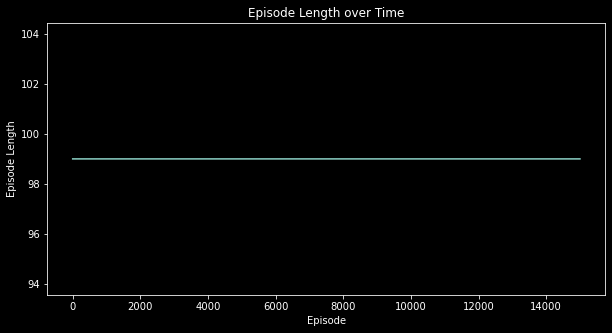

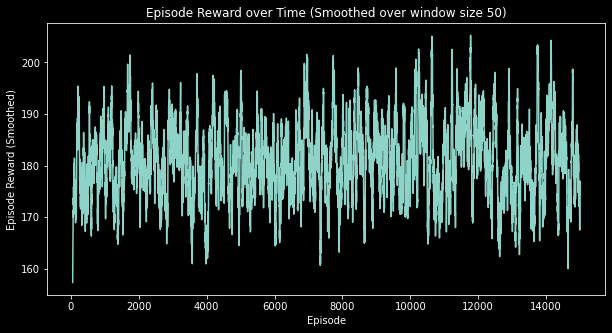

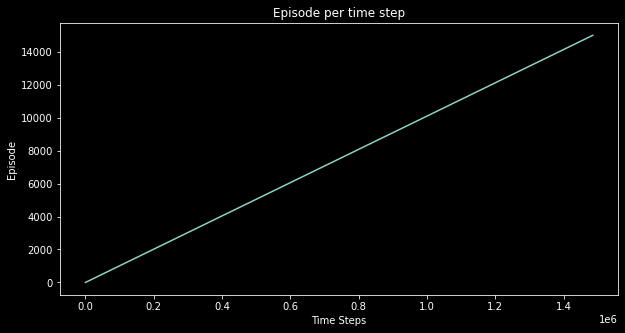

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_episode_stats(stats, smoothing_window=10):
  # Plot the episode length over time
  fig1 = plt.figure(figsize=(10,5))
  plt.plot(stats['episode_lengths'])
  plt.xlabel("Episode")
  plt.ylabel("Episode Length")
  plt.title("Episode Length over Time")

  # Plot the episode reward over time
  fig2 = plt.figure(figsize=(10,5))
  rewards_smoothed = pd.Series(stats['episode_rewards']).rolling(smoothing_window, min_periods=smoothing_window).mean()
  plt.plot(rewards_smoothed)
  plt.xlabel("Episode")
  plt.ylabel("Episode Reward (Smoothed)")
  plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))

  # Plot time steps and episode number
  fig3 = plt.figure(figsize=(10,5))
  plt.plot(np.cumsum(stats['episode_lengths']), np.arange(len(stats['episode_lengths'])))
  plt.xlabel("Time Steps")
  plt.ylabel("Episode")
  plt.title("Episode per time step")

plot_episode_stats(stats, smoothing_window=50)

## Question 4

**4a)** Define the MDP corresponding to the Chain environment above and verify that the optimal $Q^*$ value obtained using simple Q-learning is the same as the optimal value function $V^*$ for the corresponding MDP's optimal action. Hint: compare values obtained using value iteration and Q-learning.


**4b)** What is the importance of exploration in RL? Explain with an example.

Exploration enables new information to be accessed and analyzed that otherwise would not be accessible. If for example you were in another country for a week and went to 3 different restaurants there. You might have found one of them to be to your satisfaction and thus would not want to try another one. This would be a local optimum. If you then chose not to explore you would never know if there in reality was an even better restaurant out there. Exploration enables you to try different ones and evaluate them. 
Side note: Since you will only be there for a short time you should try to explore more in the beginning and towards the end explore less and less. Similar algorithms could be utilized when testing as well.


## Question 5

**5a)** Give a summary of how a decision tree works and how it extends to random forests.



A decision tree utilizes a dataset and divides it based on “questions” concerning its features. If we were to have a number of fruits, we could have a question about their colors. The tree would then create different branches which would correspond to a node based on the color features of each fruit. This would then be repeated for a series of questions creating a tree branching structure. This could then be used to help determine what type of fruit a future random fruit is.

One problem with decision trees is that many questions would result in a greater accuracy, whilst also increasing the risk of overfitting. Furthermore if the questions vary slightly the trees’ structure can change dramatically. This could make the decision trees unstable.

The random forest is basically a collection of decision trees that cast a vote with majority rules to determine the answer to the “question”.  This increases the accuracy; however, the collection of decision trees should be somewhat uncorrelated. This could be achieved by the usages of randomness when they are created by random number of “questions” and types.

**5b)** Explain what makes reinforcement learning different from supervised learning tasks such as regression or classification.

Reinforcement learning differs from supervised learning mainly in that it learns from it's environment and not from at set of predefined labeled or unlabeled data. This puts reinforcement learning in the class of unsupervised machine learning algorithms. However, it still differs from other types of unsupervised learning such as clustering in that it learns on it's own through a method of trial and error and feedback from the environment. One big advantage of this, comparing it to supervised learning, is that it does not need huge amounts of data in order to train the system for arriving at a generalized formula. Instead the learning agent creates data on its own to by interacting with the environment.


More generally, reinforcement learning focuses on **sequential decision making** where, given the current input from the environment, the agent makes a decision, and the next input depends on that decision. In supervised learning, such as regression and classification, the decisions are independent of each other.


Another notable difference between the two classes is that reinforcement learning does not require as much involvement of it's teacher. In some sense, one might claim it's more independent than supervised learning models. The motivation behind this is that supervised learning requires more work by it's designer in the training process, since it requires large amount of processed data, and further needs to be tweaked and evaluated upon that data. Supervised learning essentially answers the question *"I know how to classify this data, I just need you (the model) to do this task"*. Reinforcement learning, on the other hand, only really needs the teacher to reward or punish the model based on it's output for it to learn. Hence, it answers the question *"I don't know how to ACT in this environment, can you find a good policy/behavior and meanwhile I'll give you feedback"*


# References
Primer/text based on the following references:
* http://www.cse.chalmers.se/~chrdimi/downloads/book.pdf
* https://github.com/olethrosdc/ml-society-science/blob/master/notes.pdf